<a href="https://colab.research.google.com/github/vladgap/Various/blob/main/Backprop_regress_article_with_PReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://peterroelants.github.io/posts/neural-network-implementation-part04/

In [29]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  # Matrix and vector computation package
import sklearn
import sklearn.datasets # To generate the dataset
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
import seaborn as sns  # Fancier plots

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=1)
#

In [30]:
data=[
[0.32,	0.99,	0.77,	0.69,	0.04,	0.37,	0.25,	0.44,	0.42,	0.64,	0.8,],
[0.4,	0.23,	0.22,	0.57,	0.78,	0.69,	0.2,	0.45,	0.17,	0.98,	0.96,],
[4.952768,	5.924299,	5.412533,	5.214509,	4.844064,	4.912653,	4.975625,	4.995184,	5.040088,	5.066144,	5.32,],
]
data=np.array(data).T
data

array([[0.32    , 0.4     , 4.952768],
       [0.99    , 0.23    , 5.924299],
       [0.77    , 0.22    , 5.412533],
       [0.69    , 0.57    , 5.214509],
       [0.04    , 0.78    , 4.844064],
       [0.37    , 0.69    , 4.912653],
       [0.25    , 0.2     , 4.975625],
       [0.44    , 0.45    , 4.995184],
       [0.42    , 0.17    , 5.040088],
       [0.64    , 0.98    , 5.066144],
       [0.8     , 0.96    , 5.32    ]])

In [31]:
X=data[:,[0,1]]
X.shape

(11, 2)

In [32]:
T=data[:,[2]]
T.shape

(11, 1)

In [33]:
a=np.array([[-1,3],[1,5],[-2,-3]], dtype=float)
a

array([[-1.,  3.],
       [ 1.,  5.],
       [-2., -3.]])

In [34]:
def PReLU(z):
    z[z<0] *= 0.001
    return z

In [35]:
PReLU(a)

array([[-1.e-03,  3.e+00],
       [ 1.e+00,  5.e+00],
       [-2.e-03, -3.e-03]])

In [36]:
a[a<0] = a[a<0]*0.001
a

array([[-1.e-06,  3.e+00],
       [ 1.e+00,  5.e+00],
       [-2.e-06, -3.e-06]])

In [37]:
def logistic(z):
    """Logistic function."""
    return 1. / (1. + np.exp(-z))

def PReLU(z):
    z[z<0] *= 0.001
    return z

def softmax(z):
    """Softmax function"""
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)


def hidden_activations(X, Wh, bh):
    """Compute the hidden activations h"""
    # return logistic((X @ Wh) + bh)
    return PReLU((X @ Wh) + bh)


def output_activations(H, Wo, bo):
    """Compute the output y"""
    # return softmax((H @ Wo) + bo)
    return (H @ Wo) + bo  #linear


def nn(X, Wh, bh, Wo, bo):
    """Neural network as function."""
    return output_activations(hidden_activations(X, Wh, bh), Wo, bo)


def nn_predict(X, Wh, bh, Wo, bo):
    """Neural network prediction function that only returns
    1 or 0 depending on the predicted class"""
    return np.around(nn(X, Wh, bh, Wo, bo))

In [38]:
def loss(Y, T):
    """Loss function"""
    # return - (T * np.log(Y)).sum() # softmax layer with corresponding cross-entropy loss function
    
    SE=(Y-T).sum(axis=1)**2 # MSE
    MSE=SE.sum()/X.shape[0]
    return MSE


def error_output(Y, T):
    """Error function at the output"""
    return Y - T


def gradient_weight_out(H, Eo):
    """Gradients for the weight parameters at the output layer"""
    return  H.T @ Eo


def gradient_bias_out(Eo):
    """Gradients for the bias parameters at the output layer"""
    return  np.sum(Eo, axis=0, keepdims=True)

In [39]:
def error_hidden(H, Wo, Eo):
    """Error at the hidden layer.
    H * (1-H) * (E . Wo^T) for sigmoid
    PReLU(H) * (E . Wo^T) for PReLU"""
    # return np.multiply(np.multiply(H,(1 - H)), (Eo @ Wo.T)) # sigmoid
    return np.multiply(PReLU(H), (Eo @ Wo.T)) # PReLU


def gradient_weight_hidden(X, Eh):
    """Gradient for the weight parameters at the hidden layer"""
    return X.T @ Eh


def gradient_bias_hidden(Eh):
    """Gradient for the bias parameters at the output layer"""
    return  np.sum(Eh, axis=0, keepdims=True)

In [68]:
# Initialize weights and biases
layers=[2,2,1]
init_var = 1
# Initialize hidden layer parameters
bh = np.random.randn(1, layers[1]) * init_var
Wh = np.random.randn(layers[0], layers[1]) * init_var
# Initialize output layer parameters
bo = np.random.randn(1, layers[2]) * init_var
Wo = np.random.randn(layers[1], layers[2]) * init_var

# Compute the gradients by backpropagation
# Compute the activations of the layers
H = hidden_activations(X, Wh, bh)
Y = output_activations(H, Wo, bo)
# Compute the gradients of the output layer
Eo = error_output(Y, T)
JWo = gradient_weight_out(H, Eo)
Jbo = gradient_bias_out(Eo)
# Compute the gradients of the hidden layer
Eh = error_hidden(H, Wo, Eo)
JWh = gradient_weight_hidden(X, Eh)
Jbh = gradient_bias_hidden(Eh)

In [69]:
#
nn(X, Wh, bh, Wo, bo)

array([[0.72488477],
       [0.67633653],
       [0.70774323],
       [0.69710823],
       [0.29585331],
       [0.55880085],
       [0.78175047],
       [0.73957311],
       [0.75983463],
       [0.52732362],
       [0.63878329]])

In [70]:
#
JWh

array([[0.9267031 , 5.22584805],
       [3.04498257, 4.77432742]])

In [71]:
def backprop_gradients(X, T, Wh, bh, Wo, bo):
    """Update the network parameters over 1 iteration."""
    # Compute the output of the network
    # Compute the activations of the layers
    H = hidden_activations(X, Wh, bh)
    Y = output_activations(H, Wo, bo)
    # Compute the gradients of the output layer
    Eo = error_output(Y, T)
    JWo = gradient_weight_out(H, Eo)
    Jbo = gradient_bias_out(Eo)
    # Compute the gradients of the hidden layer
    Eh = error_hidden(H, Wo, Eo)
    JWh = gradient_weight_hidden(X, Eh)
    Jbh = gradient_bias_hidden(Eh)
    return [JWh, Jbh, JWo, Jbo]

In [72]:
#
backprop_gradients(X, T, Wh, bh, Wo, bo)

[array([[0.9267031 , 5.22584805],
        [3.04498257, 4.77432742]]),
 array([[3.86717753, 8.84329687]]),
 array([[ -5.64632886],
        [-71.96094589]]),
 array([[-49.54987496]])]

# Gradient Descent

In [73]:
eps = 0.001 #learning rate
epochs=10000
ls_loss_gd = [loss(nn(X, Wh, bh, Wo, bo), T)]
Wh_iter= Wh.copy()
bh_iter= bh.copy()
Wo_iter= Wo.copy()
bo_iter= bo.copy()

for i in range(epochs):
    gradients_iter=backprop_gradients(X, T, Wh_iter, bh_iter, Wo_iter, bo_iter)
    Wh_iter -= eps*gradients_iter[0]
    bh_iter -= eps*gradients_iter[1]
    Wo_iter -= eps*gradients_iter[2]
    bo_iter -= eps*gradients_iter[3]
    ls_loss_gd.append(loss(nn(X, Wh_iter, bh_iter, Wo_iter, bo_iter), T))
print('Final loss =',ls_loss_gd[-1],'\n')
print ('Final gradients:')
display(gradients_iter)
Wh_f, bh_f, Wo_f, bo_f = Wh_iter, bh_iter, Wo_iter, bo_iter

Final loss = 0.007667635935899759 

Final gradients:


[array([[-0.00106426, -0.02135457],
        [-0.02124548,  0.0100176 ]]),
 array([[-0.02722908,  0.00766676]]),
 array([[-0.06478091],
        [ 0.00508751]]),
 array([[-0.0064165]])]

Initial loss = 20.375851732994732
Final loss = 0.007667635935899759


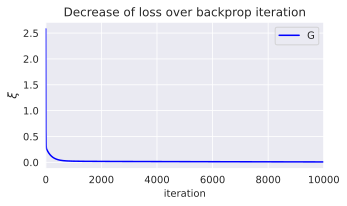

In [74]:
# Plot the loss over the iterations
fig = plt.figure(figsize=(5, 3))
plt.plot(ls_loss_gd[20:], 'b-')
plt.xlabel('iteration')
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Decrease of loss over backprop iteration')
plt.xlim(0,epochs)
fig.subplots_adjust(bottom=0.2)
plt.legend('Gradient descent')
print('Initial loss =', ls_loss_gd[0])
print('Final loss =', ls_loss_gd[-1])
plt.show()
#

In [75]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(y=ls_loss_gd[20:], name='sigmoid'))
print('Initial loss =', ls_loss_gd[0])
print('Final loss =', ls_loss_gd[-1])

# fig1.update_yaxes(range=[0, 1])
fig1.show()

Initial loss = 20.375851732994732
Final loss = 0.007667635935899759


In [76]:
predics=nn(X, Wh_f, bh_f, Wo_f, bo_f)
predics[:,0]

array([4.94303641, 5.74580293, 5.50323432, 5.30205903, 4.70495598,
       4.91871227, 4.92872872, 5.06111659, 5.12822001, 5.11523   ,
       5.30035575])

In [77]:
pip install doepy

In [78]:
from doepy import build

In [79]:
list1={'x1':np.linspace(-1, 2, 31),'x2':np.linspace(-1, 2, 31)}
mesh_data=build.full_fact(list1)
display(mesh_data[:5])

,x1,x2
0,-1.0,-1.0
1,-0.9,-1.0
2,-0.8,-1.0
3,-0.7,-1.0
4,-0.6,-1.0


In [80]:
mesh_sc=mesh_data[['x1','x2']]
mesh_predics=nn(np.array(mesh_sc),Wh_f, bh_f, Wo_f, bo_f)[:,0]
# mesh_predics

In [81]:
fig_predic=go.Figure()
fig_predic.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2], mode='markers', name='data'))
fig_predic.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=predics[:,0], mode='markers', name='predics'))
fig_predic.add_trace(go.Scatter3d(x=mesh_data.x1, y=mesh_data.x2, z=mesh_predics, mode='markers', marker_size=2, name='mesh-predics'))
x=np.linspace(0, 1, 11)
y=np.linspace(0, 1, 11)
x, y = np.meshgrid(x,y)
z=x**3-.2*y+5
fig_predic.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=0, opacity=0.5,))
fig_predic.update_scenes(camera_projection_type="orthographic")

fig_predic.show()